In [1]:
import numpy as np
import os 
import tensorflow as tf
import keras
import pandas as pd 
import matplotlib.pyplot as plt 
import pathlib
from PIL import ImageFilter, ImageOps, Image


In [2]:
train_path = pathlib.Path("Training").with_suffix('')

In [3]:
print(train_path)

Training


In [4]:
image_count = len(list(train_path.glob('*/*.jpg')))
print(image_count)

5712


In [5]:
os.listdir(train_path)

['glioma', 'meningioma', 'notumor', 'pituitary', 'resized']

In [6]:
## list of all image paths 

glioma = list(train_path.glob('glioma/*'))
meningioma = list(train_path.glob('meningioma/*'))
notumor = list(train_path.glob('notumor/*'))
pituitary = list(train_path.glob('pituitary/*'))

In [7]:
print( len(glioma), glioma)
print('\n', len(meningioma), meningioma)
print('\n', len(notumor), notumor)
print('\n', len(pituitary), pituitary)

1321 [WindowsPath('Training/glioma/Tr-glTr_0000.jpg'), WindowsPath('Training/glioma/Tr-glTr_0001.jpg'), WindowsPath('Training/glioma/Tr-glTr_0002.jpg'), WindowsPath('Training/glioma/Tr-glTr_0003.jpg'), WindowsPath('Training/glioma/Tr-glTr_0004.jpg'), WindowsPath('Training/glioma/Tr-glTr_0005.jpg'), WindowsPath('Training/glioma/Tr-glTr_0006.jpg'), WindowsPath('Training/glioma/Tr-glTr_0007.jpg'), WindowsPath('Training/glioma/Tr-glTr_0008.jpg'), WindowsPath('Training/glioma/Tr-glTr_0009.jpg'), WindowsPath('Training/glioma/Tr-gl_0010.jpg'), WindowsPath('Training/glioma/Tr-gl_0011.jpg'), WindowsPath('Training/glioma/Tr-gl_0012.jpg'), WindowsPath('Training/glioma/Tr-gl_0013.jpg'), WindowsPath('Training/glioma/Tr-gl_0014.jpg'), WindowsPath('Training/glioma/Tr-gl_0015.jpg'), WindowsPath('Training/glioma/Tr-gl_0016.jpg'), WindowsPath('Training/glioma/Tr-gl_0017.jpg'), WindowsPath('Training/glioma/Tr-gl_0018.jpg'), WindowsPath('Training/glioma/Tr-gl_0019.jpg'), WindowsPath('Training/glioma/Tr-gl

In [10]:
im1= Image.open(glioma[0])
im1.show()

In [9]:
im1.size

(512, 512)

In [11]:
batch_size = 32
img_height = 512
img_width = 512

In [13]:
no_of_images_of_glioma = len(glioma)
no_of_images_of_pituitary = len(pituitary)
no_of_images_of_meningioma = len(meningioma)
no_of_images_of_notumor = len(notumor)

In [14]:
print(no_of_images_of_pituitary, no_of_images_of_glioma,no_of_images_of_meningioma,no_of_images_of_notumor)

1457 1321 1339 1595


In [15]:
no_of_images_in_each_category = [ no_of_images_of_glioma,no_of_images_of_meningioma,no_of_images_of_pituitary, no_of_images_of_notumor,]

In [16]:
print(no_of_images_in_each_category)

[1321, 1339, 1457, 1595]


In [17]:
class_names = [ "glioma" , "meningioma" ,  "pituitary", "notumor"]

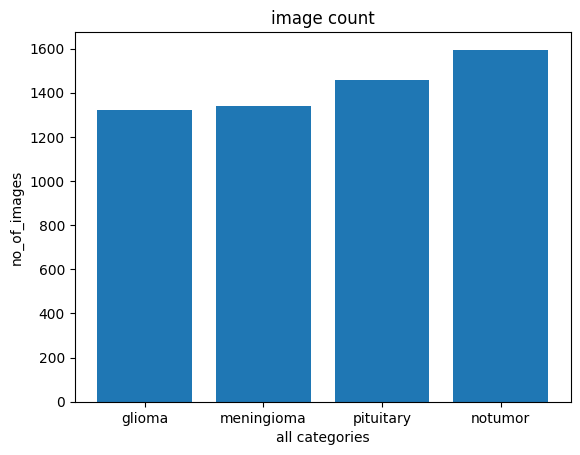

In [20]:
plt.bar(class_names, no_of_images_in_each_category)

plt.xlabel('all categories')
plt.ylabel('no_of_images')
plt.title("image count")


plt.show()


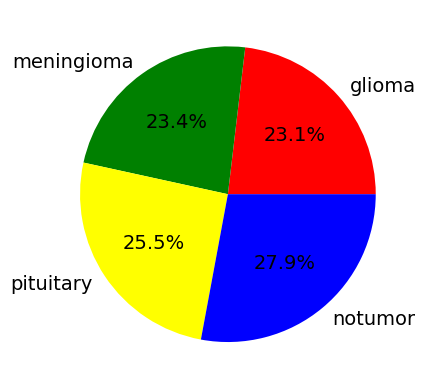

In [40]:
plt.pie(no_of_images_in_each_category, labels=class_names,colors=['red', 'green', 'yellow','blue'], autopct='%.1f%%');

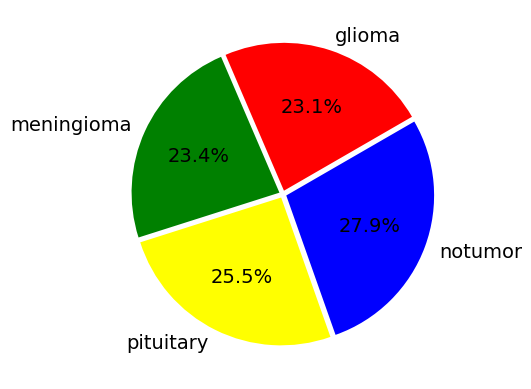

In [46]:
plt.pie(no_of_images_in_each_category, 
        labels=class_names,
        colors=['red', 'green', 'yellow','blue'], 
        autopct='%.1f%%', startangle=30,
        explode=(0.025,0.025,0.025,0.025,));

In [79]:
## Resizing the image from 512 x 512 to 112 x 112

In [22]:
train_path

WindowsPath('Training')

In [ ]:
os.mkdir(str(train_path)+ '\\resized')
os.mkdir(str(train_path)+ '\\resized' +'\\resized_glioma')
os.mkdir(str(train_path)+ '\\resized' +'\\resized_meningioma')
os.mkdir(str(train_path)+ '\\resized' +'\\resized_notumor')
os.mkdir(str(train_path)+ '\\resized' +'\\resized_pituitary')


In [26]:
def equalization(image):
    equalized_image = ImageOps.equalize(image)

    return equalized_image

In [27]:
def gaussian_filter(image):
    
    # ImageFilter for using filter() function
    # Blurring image by sending the ImageFilter.
    # GaussianBlur predefined kernel argument

    filtered_image = image.filter(ImageFilter.GaussianBlur)
  
    # Displaying the image
   

    return filtered_image

In [29]:
##imgs = glioma / pituitary / meningioma / notumor

def resizing(imgs):
    file_dir= (str(imgs[0]).split('\\'))[1]
    for each in imgs:
        # open image file
        image = Image.open(each)

        ## convert to grayscale image 

        image = image.convert('L')

        # resize image
        width, height = image.size
        new_size = (112, 112)    
        resized_image = image.resize(new_size)

        #applying gaussian filter 

        filtered_image = gaussian_filter(resized_image)


        ## equalization of images 

        equalized_image = equalization(filtered_image)

        ## image name

        p= str(each).split('\\')[-1]
        file_name = p.split('.')
        
        file_name = file_name[0]+"_resized."+file_name[1]
        # save resized image
        resized_image.save(str(train_path) + "\\resized" + f"\\resized_{file_dir}"+"\\"+file_name)
        resized_image.close()
       
    

In [130]:
resizing(glioma)
resizing(pituitary)
resizing(notumor)
resizing(meningioma)

In [2]:
new_train_path = pathlib.Path("Training\\resized").with_suffix('')
print(new_train_path)

Training\resized


In [3]:
## list of all image paths 

processed_glioma = list(new_train_path.glob('resized_glioma/*'))
processed_meningioma = list(new_train_path.glob('resized_meningioma/*'))
processed_notumor = list(new_train_path.glob('resized_notumor/*'))
processed_pituitary = list(new_train_path.glob('resized_pituitary/*'))

In [ ]:
processed_glioma

In [4]:
data = []
data= processed_glioma + processed_meningioma + processed_notumor + processed_pituitary 
''' 1. meningioma
    2. glioma
    3. pituitary tumor
    4. notumor
'''
data_label = []
data_label = data_label + [2]*len(processed_glioma) + [1]*len(processed_meningioma) + [4]*len(processed_notumor) + [3]*len(processed_pituitary)


In [5]:
len(data_label)

5712

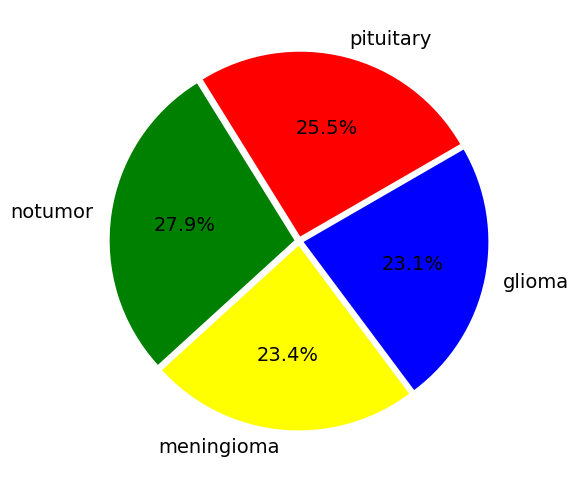

In [6]:
plt.figure(figsize=(14,6))
colors = ['red','green','yellow','blue']
plt.rcParams.update({'font.size': 14})
plt.pie([len(processed_pituitary), len(processed_notumor), len(processed_meningioma), len(processed_glioma)],
        labels=['pituitary','notumor', 'meningioma', 'glioma'],
        colors=colors, autopct='%.1f%%', explode=(0.025,0.025,0.025,0.025),
        startangle=30);

In [7]:
from sklearn.model_selection import train_test_split 

In [8]:
print(len(data), len(data_label))

5712 5712


In [9]:
X = data.copy()
y= data_label.copy()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.163, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1995, random_state=42)

In [51]:
print(len(X_train))
print(len(X_test))
print(len(X_val))

print(len(X_train) + len(X_test) + len(X_val) )



3826
932
954
5712


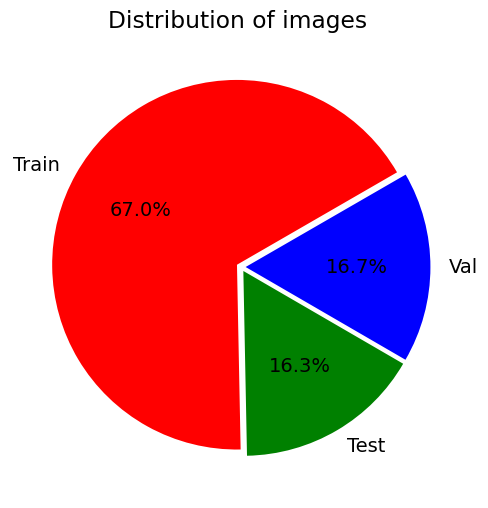

In [11]:
plt.figure(figsize=(14,6))
colors = ['red', 'green', 'blue']
plt.rcParams.update({'font.size': 14})
plt.title('Distribution of images ')
plt.pie([len(X_train), len(X_test), len(X_val)],
        labels=['Train', 'Test', 'Val'],
        colors=colors, autopct='%.1f%%', explode=(0.025, 0.025,0.025),
        startangle=30);


In [12]:
from PIL import ImageEnhance
import random 

In [64]:
## X_train , X_test, X_val , y_test, y_train, y_val 

print(X_train)

['Training\\resized\\resized_pituitary\\Tr-pi_0628_resized.jpg', 'Training\\resized\\resized_pituitary\\Tr-pi_0900_resized.jpg', 'Training\\resized\\resized_notumor\\Tr-no_0253_resized.jpg', 'Training\\resized\\resized_glioma\\Tr-gl_0762_resized.jpg', 'Training\\resized\\resized_pituitary\\Tr-pi_0267_resized.jpg', 'Training\\resized\\resized_meningioma\\Tr-me_0418_resized.jpg', 'Training\\resized\\resized_pituitary\\Tr-pi_1414_resized.jpg', 'Training\\resized\\resized_glioma\\Tr-gl_1267_resized.jpg', 'Training\\resized\\resized_notumor\\Tr-no_0972_resized.jpg', 'Training\\resized\\resized_pituitary\\Tr-pi_0318_resized.jpg', 'Training\\resized\\resized_notumor\\Tr-no_1194_resized.jpg', 'Training\\resized\\resized_meningioma\\Tr-me_1244_resized.jpg', 'Training\\resized\\resized_meningioma\\Tr-me_0139_resized.jpg', 'Training\\resized\\resized_notumor\\Tr-no_1480_resized.jpg', 'Training\\resized\\resized_meningioma\\Tr-me_0598_resized.jpg', 'Training\\resized\\resized_notumor\\Tr-no_0915_r

In [14]:
def pixel_matrix(images):
    X_train_mat = np.zeros((1,12544))
    for each in images:
        img = Image.open(each)

        if img.mode != 'L':
            img= img.convert('L')
        
        img_array = np.array(img)
        img_flat = img_array.flatten()
        X_train_mat = np.vstack((X_train_mat,img_flat))

    return X_train_mat

In [15]:
for i in range(len(X_train)):
    X_train[i] = str(X_train[i])

for i in range(len(X_test)):
    X_test[i] = str(X_test[i])

for i in range(len(X_val)):
    X_val[i] = str(X_val[i])

In [16]:
X_train_mat = pixel_matrix(X_train)

In [17]:
X_test_mat = pixel_matrix(X_test)
X_val_mat = pixel_matrix(X_val)

In [18]:
X_train_mat = np.delete(X_train_mat, 0, axis=0)
X_test_mat = np.delete(X_test_mat, 0, axis=0)
X_val_mat = np.delete(X_val_mat, 0, axis=0)


In [19]:
y_test = np.array(y_test)
y_train = np.array(y_train)  
y_val = np.array(y_val)


In [20]:
print(X_test_mat.shape, y_test.shape)
print(X_train_mat.shape, y_train.shape)
print(X_val_mat.shape, y_val.shape)

(932, 12544) (932,)
(3826, 12544) (3826,)
(954, 12544) (954,)


In [ ]:
## Multiclass Logistic Regression Model 

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [64]:
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=50000)
# train the model on the training set
logistic_model.fit(X_train_mat, y_train)

# make predictions on the validation set
y_pred = logistic_model.predict(X_val_mat)



In [65]:
# evaluate the model's accuracy on the validation set
accuracy = accuracy_score(y_val, y_pred)
print("Validation accuracy:", accuracy)

## Precision 
precision = precision_score(y_val, y_pred, average="weighted")
## Recall 
recall = recall_score(y_val, y_pred, average="weighted")
## F1- score 
f1 = f1_score(y_val, y_pred, average="weighted")
## confusion Matrix
conf_mat = confusion_matrix(y_val, y_pred)

Validation accuracy: 0.8176100628930818


In [32]:
print("Validation accuracy:", accuracy)
print("Precision :", precision)
print("Recall :", recall)
print("f1score:", f1)
print(conf_mat)

NameError: name 'accuracy' is not defined

In [22]:
from keras import layers
from keras.layers.core import Dense
from keras.models import Sequential 

In [23]:
len(X_train_mat)

3826

In [24]:
X_train_mat_unflattened = np.reshape(X_train_mat,(len(X_train_mat),112,112))
X_test_mat_unflattened = np.reshape(X_test_mat, (len(X_test_mat),112,112))
X_val_mat_unflattened = np.reshape(X_val_mat, (len(X_val_mat),112,112))


In [25]:
np.unique(X_train_mat_unflattened/255)

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568627,
       0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
       0.03921569, 0.04313725, 0.04705882, 0.05098039, 0.05490196,
       0.05882353, 0.0627451 , 0.06666667, 0.07058824, 0.0745098 ,
       0.07843137, 0.08235294, 0.08627451, 0.09019608, 0.09411765,
       0.09803922, 0.10196078, 0.10588235, 0.10980392, 0.11372549,
       0.11764706, 0.12156863, 0.1254902 , 0.12941176, 0.13333333,
       0.1372549 , 0.14117647, 0.14509804, 0.14901961, 0.15294118,
       0.15686275, 0.16078431, 0.16470588, 0.16862745, 0.17254902,
       0.17647059, 0.18039216, 0.18431373, 0.18823529, 0.19215686,
       0.19607843, 0.2       , 0.20392157, 0.20784314, 0.21176471,
       0.21568627, 0.21960784, 0.22352941, 0.22745098, 0.23137255,
       0.23529412, 0.23921569, 0.24313725, 0.24705882, 0.25098039,
       0.25490196, 0.25882353, 0.2627451 , 0.26666667, 0.27058824,
       0.2745098 , 0.27843137, 0.28235294, 0.28627451, 0.29019

In [26]:
X_train_mat_unflattened.shape


(3826, 112, 112)

In [60]:
model = Sequential([
    
    layers.Conv2D(filters=32, kernel_size=(5,5), strides=(1,1), padding="valid", activation="relu", input_shape=(112,112,1)),
    layers.MaxPooling2D(pool_size=(2,2),strides=(1,1)),
    layers.Dropout(rate=0.25),
    layers.Conv2D(filters=64, kernel_size=(5,5), padding="valid", strides=(1,1), activation="relu"),
    layers.MaxPooling2D(pool_size=(2,2),strides=(1,1)),
    layers.Dropout(rate=.25),
    layers.Conv2D(filters=128,kernel_size=(5,5),strides=(1,1),activation="relu"),
    layers.Dropout(rate=0.4),
    layers.Flatten(),
    layers.Dense(128, activation="softmax"),
    layers.Dropout(rate=0.3),
    layers.Dense(4, activation="softmax"),
    

])

In [40]:
from keras.optimizers import Adam

In [61]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])


In [44]:
from keras.utils import to_categorical

In [45]:
np.unique(y_train)

array([0, 1, 2, 3])

In [46]:
# 1->0 , 2->1 .. 4->3

y_train_new = y_train
y_val_new = y_val
y_test_new = y_test

In [30]:
y_train_new[y_train_new==1]=0
y_train_new[y_train_new==2]=1
y_train_new[y_train_new==3]=2
y_train_new[y_train_new==4]=3


In [31]:
y_test_new[y_test_new==1]=0
y_test_new[y_test_new==2]=1
y_test_new[y_test_new==3]=2
y_test_new[y_test_new==4]=3

In [32]:
y_val_new[y_val_new==1]=0
y_val_new[y_val_new==2]=1
y_val_new[y_val_new==3]=2
y_val_new[y_val_new==4]=3

In [33]:
np.unique(y_train_new)

array([0, 1, 2, 3])

In [34]:
y_test.shape

(932,)

In [47]:
y_train_onehot = to_categorical(y_train_new, num_classes=4)

In [48]:
y_test_onehot = to_categorical(y_test_new, num_classes=4)
y_val_onehot = to_categorical(y_val_new, num_classes=4)


In [49]:
y_val_onehot.shape

(954, 4)

In [58]:
y_train_onehot.

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [59]:
np.unique(y_train_onehot)

array([0., 1.], dtype=float32)

In [51]:
X_train_mat_unflattened.shape


(3826, 112, 112)

In [57]:
np.unique(y_train_new)

array([0, 1, 2, 3])

In [70]:
model.fit(X_train_mat_unflattened/255, y_train_onehot, epochs=10, batch_size=32)


Epoch 1/10
120/120 [==============================] - 149s 1s/step - loss: 1.3852 - accuracy: 0.2757
Epoch 2/10
120/120 [==============================] - 153s 1s/step - loss: 1.3843 - accuracy: 0.2852
Epoch 3/10
120/120 [==============================] - 152s 1s/step - loss: 1.3844 - accuracy: 0.2825
Epoch 4/10
120/120 [==============================] - 152s 1s/step - loss: 1.3840 - accuracy: 0.2852
Epoch 5/10
120/120 [==============================] - 152s 1s/step - loss: 1.3845 - accuracy: 0.2765
Epoch 6/10
120/120 [==============================] - 152s 1s/step - loss: 1.3847 - accuracy: 0.2755
Epoch 7/10
120/120 [==============================] - 152s 1s/step - loss: 1.3846 - accuracy: 0.2852
Epoch 8/10
120/120 [==============================] - 152s 1s/step - loss: 1.3835 - accuracy: 0.2852
Epoch 9/10
120/120 [==============================] - 152s 1s/step - loss: 1.3841 - accuracy: 0.2831
Epoch 10/10
120/120 [==============================] - 152s 1s/step - loss: 1.3845 - accura

In [55]:
# Predict on test data
predictions = model.predict(X_test_mat_unflattened/255)

# Evaluate the model
score = model.evaluate(X_test_mat_unflattened/255, y_test_new, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

30/30 [==============================] - 7s 230ms/step
Test loss: 1.3876546621322632
Test accuracy: 0.2607296109199524
